<a href="https://colab.research.google.com/github/RezaBahani/IUTComputationalPhysics/blob/main/two_dimensional_random_walk_with_extensive_help_of_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

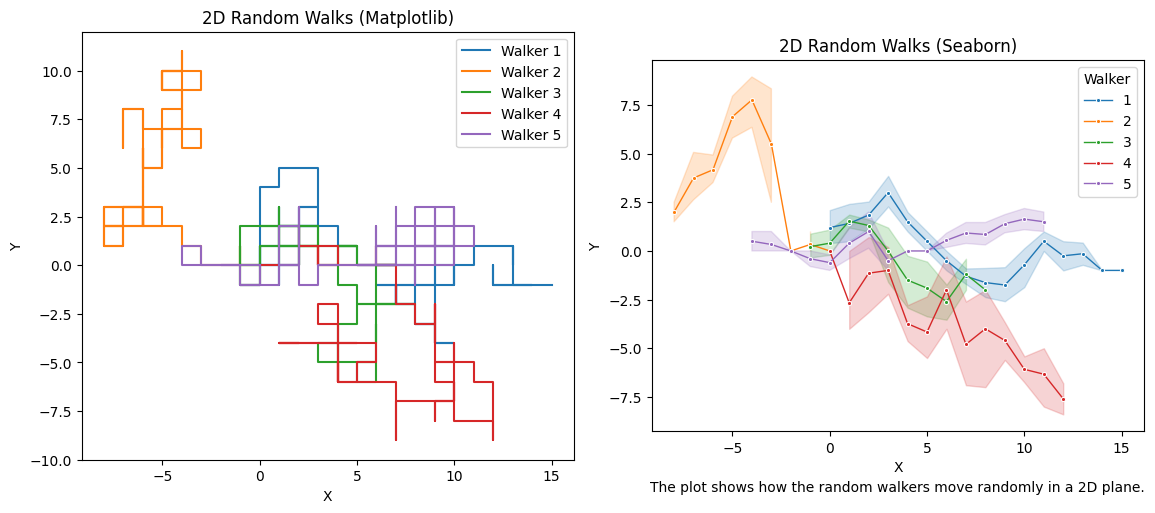

In [ ]:
# prompt: wtire a code for two dimwnsionsal random walk and plot the results for 5 different random walker, generate two duffernt plot using matplotlib and seaborn, use fixed initial condition for all random walkers, make plots squre and to be beside eachother yo better comparision, wirte a littel note under the plot using seaborn to interpert the result, and plot it to be scale like the plot using matplotlib

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import numpy as np

def random_walk_2d(steps):
    x, y = 0, 0
    x_values = [x]
    y_values = [y]
    for _ in range(steps):
        dx, dy = random.choice([(0, 1), (0, -1), (1, 0), (-1, 0)])
        x += dx
        y += dy
        x_values.append(x)
        y_values.append(y)
    return x_values, y_values


# Set the number of steps and the number of random walkers
num_steps = 100
num_walkers = 5

# Initialize lists to store the x and y coordinates of each random walker
all_x = []
all_y = []

# Fixed initial condition
initial_x, initial_y = 0, 0

# Simulate the random walks
for _ in range(num_walkers):
  x, y = random_walk_2d(num_steps)
  all_x.append(x)
  all_y.append(y)


# Matplotlib plot

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

for i in range(num_walkers):
    axes[0].plot(all_x[i], all_y[i], label=f"Walker {i+1}")

axes[0].set_title("2D Random Walks (Matplotlib)")
axes[0].set_xlabel("X")
axes[0].set_ylabel("Y")
axes[0].legend()
axes[0].set_aspect('equal')


# Seaborn plot

df = pd.DataFrame({'X': [item for sublist in all_x for item in sublist],
                   'Y': [item for sublist in all_y for item in sublist],
                   'Walker': np.repeat(np.arange(1,num_walkers+1), num_steps+1)})
sns.lineplot(ax=axes[1], x="X", y="Y", hue='Walker', data=df, palette="tab10", legend="full", marker='o', markersize=3, linewidth=1)

axes[1].set_title("2D Random Walks (Seaborn)")
axes[1].set_xlabel("X")
axes[1].set_ylabel("Y")
axes[1].set_aspect('equal')

# Add a note under the seaborn plot
axes[1].text(0.5, -0.15, "The plot shows how the random walkers move randomly in a 2D plane.",
             ha='center', va='center', transform=axes[1].transAxes)

plt.tight_layout()
plt.show()



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def polar2dRanW(N, r = 1, trials = 10000):
  random_angle = np.random.uniform(0, 2*np.pi, (trials, N))
  x_values = np.sum(r * np.cos(random_angle), 1)
  y_values = np.sum(r * np.sin(random_angle), 1)
  r2values = x_values**2 + y_values**2
  r2avg = np.average(r2values)
  r2mean = np.mean(r2values)

  return np.sqrt(r2avg)

100%|██████████| 19/19 [00:07<00:00,  2.58it/s]


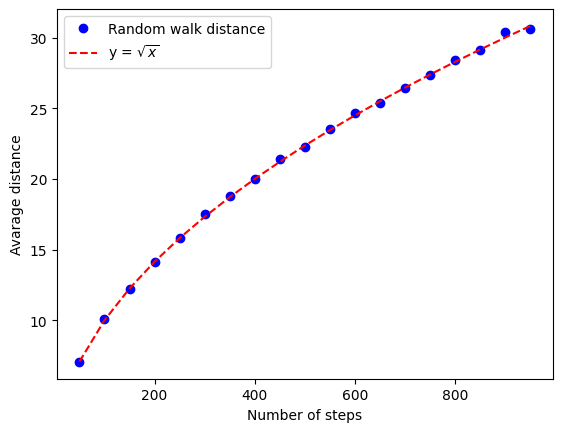

In [ ]:
from tqdm import tqdm

NVals = range(50 , 1000, 50)
result = []

for N in tqdm(NVals):
  result.append( polar2dRanW(N))

plt.plot(NVals, result, 'bo', label = 'Random walk distance')
plt.plot(NVals, np.sqrt(NVals), 'r--', label = 'y = $\sqrt{x}$')
plt.xlabel('Number of steps')
plt.ylabel('Avarage distance')
plt.legend()
plt.show()

In [21]:
N = 100
r = 1

def produce_ArandomWalker(N, r):
  randomAngel = np.random.uniform(0, 2*np.pi, (N))
  xVlv = r * np.cos(randomAngel)
  yVlv = r * np.sin(randomAngel)

  stepsX = np.cumsum(xVlv)
  stepsY = np.cumsum(yVlv)

  stepsX[0] = 0
  stepsY[0] = 0

  return stepsX, stepsY

<ipython-input-27-41eb117bc6ea>:19: RuntimeWarning: invalid value encountered in sqrt
  allR.append(np.sqrt(x[-1]**2+y[-1]**1))


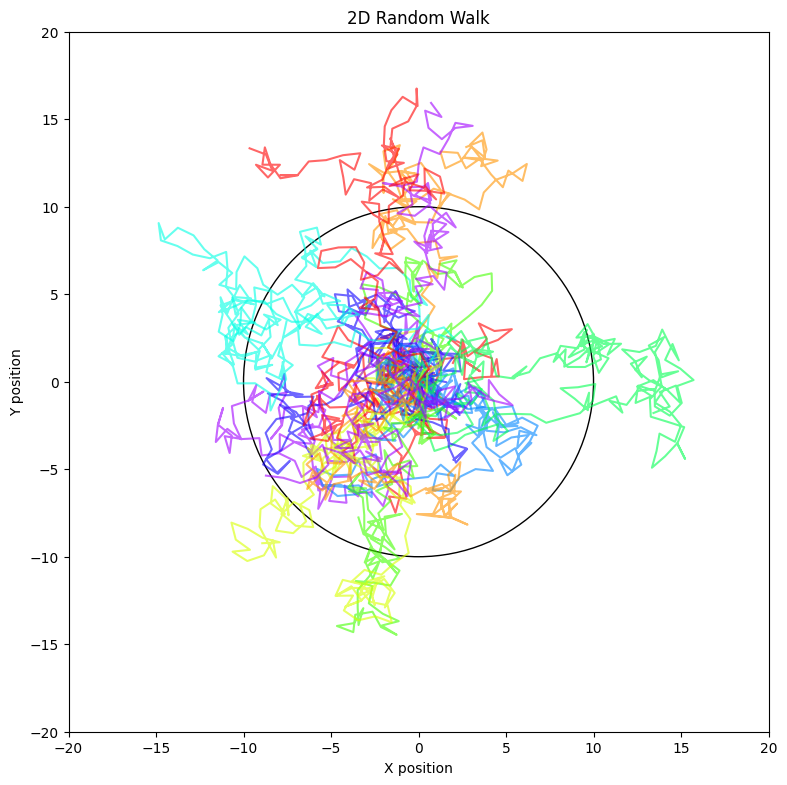

In [27]:
fig = plt.figure(figsize = (20, 20))

ax1 = plt.subplot2grid((2,1), (0,0))
avg_r = (np.average(r) + np.std(r))*np.sqrt(N)

ax1.set_xlim(- 2*avg_r, 2*avg_r)
ax1.set_ylim(- 2*avg_r, 2*avg_r)

allX = []
allY = []
allR = []

for i in range(200):
  x, y = produce_ArandomWalker(N, r)
  if i%10 == 0:
    ax1.plot(x, y, color = plt.cm.hsv(i*20%225), alpha = 0.6)
  allX.append(x[-1])
  allY.append(y[-1])
  allR.append(np.sqrt(x[-1]**2+y[-1]**1))

ax1.set_aspect(1)
ax1.add_artist(plt.Circle((0,0), avg_r, color = 'black', fill = False, alpha = 1))
ax1.set_title('2D Random Walk')
ax1.set_xlabel('X position')
ax1.set_ylabel('Y position')
plt.show()


<ipython-input-35-4a183531526a>:32: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


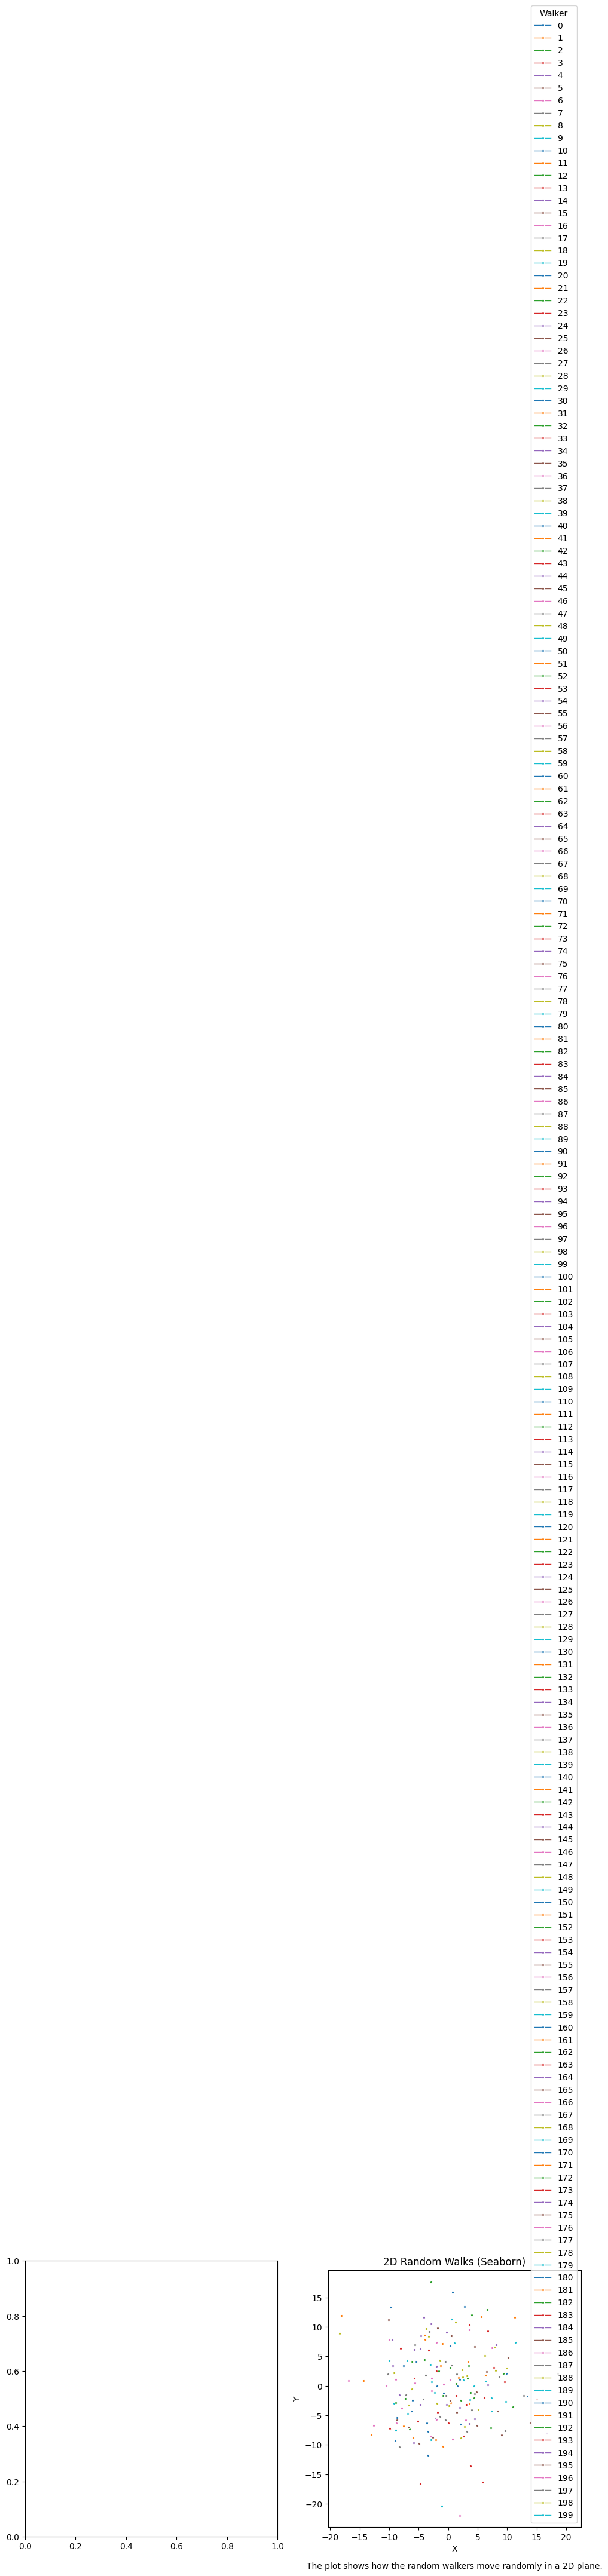

In [35]:
import pandas as pd
import seaborn as sns
import numpy as np

# Create a list of walker IDs for each data point
walker_ids = list(range(len(allX)))

fig, axes = plt.subplots(1, 2, figsize=(12, 6))


#walker_ids = [[i] * len(allX[i]) for i in range(len(allX))]
#walker_ids = [item for sublist in walker_ids for item in sublist]


df = pd.DataFrame({'X': allX,
                   'Y': allY,
                   'Walker': walker_ids})



sns.lineplot(ax=axes[1], x="X", y="Y", hue='Walker', data=df, palette="tab10", legend="full", marker='o', markersize=3, linewidth=1)

axes[1].set_title("2D Random Walks (Seaborn)")
axes[1].set_xlabel("X")
axes[1].set_ylabel("Y")
axes[1].set_aspect('equal')

# Add a note under the seaborn plot
axes[1].text(0.5, -0.15, "The plot shows how the random walkers move randomly in a 2D plane.",
             ha='center', va='center', transform=axes[1].transAxes)

plt.tight_layout()
plt.show()
